In [6]:
%pip install --upgrade matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


# Markov Chain

Properties of a Markov Chain:

1. memorylessness
2. transition probability
3. state space
4. classification of states
    * Transient vs. Recurrent
        * Transient: non-zero probability the process will never return once it has left
        * Recurrent: the process is certain to return eventually
    * Periodic vs. Aperiodic
        * Periodic: process can return to the state only at multiples of some integer larger than one
        * Aperiodic: greatest common divisor of the length of time to return is one
    * Absorbing: a state where you can't leave once you enter (the "Hotel California" of states if you will)

In [1]:
from enum import Enum
import random


class StateName(Enum):
    AVERAGEMONT = "Averagemont"
    CONTINUOPOLIS = "Continuopolis"
    BAYESVILLE = "Bayseville"
    DISCRETETOWN = "Discretetown"
    EAST_VANDERMONDE = "East Vandermonde"

states: dict[StateName, dict[StateName, float]] = {
    StateName.AVERAGEMONT: {
        StateName.CONTINUOPOLIS: (1 / 3),
        StateName.BAYESVILLE: (1 / 3),
        StateName.DISCRETETOWN: (1 / 3)
    },
    StateName.CONTINUOPOLIS: {
        StateName.BAYESVILLE: 0.5,
        StateName.AVERAGEMONT: 0.5
    },
    StateName.DISCRETETOWN: {
        StateName.BAYESVILLE: 0.5,
        StateName.AVERAGEMONT: 0.5
    },
    StateName.BAYESVILLE: {
        StateName.AVERAGEMONT: 0.25,
        StateName.CONTINUOPOLIS: 0.25,
        StateName.DISCRETETOWN: 0.25,
        StateName.EAST_VANDERMONDE: 0.25
    },
    StateName.EAST_VANDERMONDE: {
        StateName.BAYESVILLE: 1
    }
}

def state_transition(
        current_state_name: StateName,           
        states: dict[StateName, dict[StateName, float]]
    ) -> StateName:
    """
    Validates input (ensures next states add up to 1) and 
    returns next state (stochastic).
    """
    next_state_candidates = states[current_state_name]
    # validate
    probabilities_tot = 0
    probabilities_tot = sum(next_state_candidates.values())
    if probabilities_tot != 1:
        raise ValueError("State transitions probabilities don't add up to 1")
    # find next state
    next_state_prob = random.random()
    probability = 0
    for candidate in next_state_candidates:
        next_probability: float = next_state_candidates[candidate]
        probability = probability + next_probability
        if next_state_prob <= probability:
            return candidate

    


In [2]:
iterations_max = 10000
iterations = range(0,iterations_max)
current_state_name = StateName.AVERAGEMONT

counts = {
    StateName.AVERAGEMONT.value: {
        "count": 0,
        "proportion": 0
    },
    StateName.BAYESVILLE.value: {
        "count": 0,
        "proportion": 0
    },
    StateName.CONTINUOPOLIS.value: {
        "count": 0,
        "proportion": 0
    },
    StateName.DISCRETETOWN.value: {
        "count": 0,
        "proportion": 0
    },
    StateName.EAST_VANDERMONDE.value: {
        "count": 0,
        "proportion": 0
    }
}

for i in iterations:
    counts[current_state_name.value]["count"] = counts[current_state_name.value]["count"] + 1
    counts[current_state_name.value]["proportion"] = counts[current_state_name.value]["count"] / iterations_max
    current_state_name: StateName = state_transition(current_state_name, states)
    print(current_state_name.value)

Continuopolis
Bayseville
East Vandermonde
Bayseville
Discretetown
Averagemont
Continuopolis
Averagemont
Bayseville
East Vandermonde
Bayseville
Continuopolis
Bayseville
Discretetown
Averagemont
Bayseville
Continuopolis
Averagemont
Bayseville
Discretetown
Averagemont
Continuopolis
Averagemont
Bayseville
Discretetown
Bayseville
East Vandermonde
Bayseville
Discretetown
Averagemont
Discretetown
Bayseville
East Vandermonde
Bayseville
Averagemont
Bayseville
Averagemont
Bayseville
Averagemont
Discretetown
Bayseville
Discretetown
Averagemont
Discretetown
Bayseville
Continuopolis
Averagemont
Bayseville
Continuopolis
Bayseville
East Vandermonde
Bayseville
Continuopolis
Averagemont
Bayseville
Continuopolis
Averagemont
Continuopolis
Bayseville
Continuopolis
Bayseville
East Vandermonde
Bayseville
Continuopolis
Averagemont
Continuopolis
Averagemont
Discretetown
Averagemont
Bayseville
Continuopolis
Averagemont
Continuopolis
Bayseville
Averagemont
Discretetown
Averagemont
Continuopolis
Averagemont
Bays

In [3]:
counts

{'Averagemont': {'count': 2496, 'proportion': 0.2496},
 'Bayseville': {'count': 3315, 'proportion': 0.3315},
 'Continuopolis': {'count': 1666, 'proportion': 0.1666},
 'Discretetown': {'count': 1703, 'proportion': 0.1703},
 'East Vandermonde': {'count': 820, 'proportion': 0.082}}

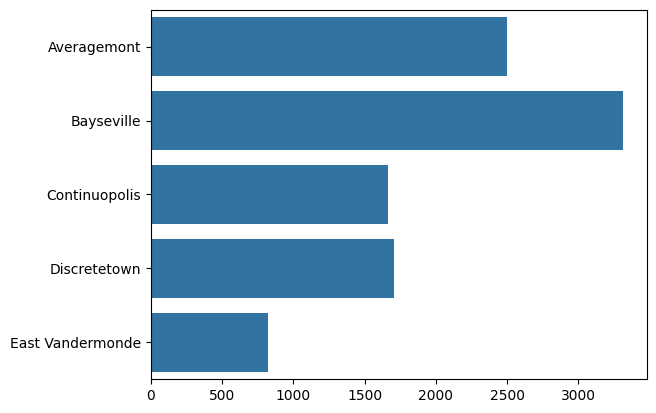

In [4]:
import seaborn as sns

keys = list(counts.keys())
count = list([value["count"] for value in counts.values()])
sns.barplot(counts, y=keys, x=count);

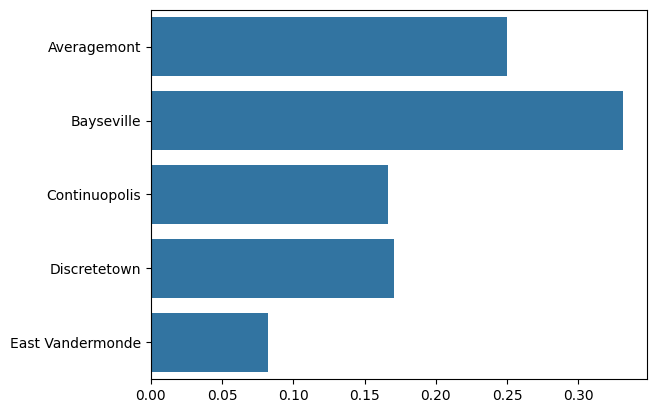

In [5]:
from seaborn import objects as so
keys = list(counts.keys())
proportions = list([value["proportion"] for value in counts.values()])
sns.barplot(counts, y=keys, x=proportions);